<a href="https://colab.research.google.com/github/seanzhu815/415/blob/main/415_assign3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Part1

##a

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/MGTF415/scraped-data.csv')

In [ ]:
df

##b

In [ ]:

 # City Variable
 df["City"] = "Other"
 df["City"] = np.where(df["Location"].str.contains("San Francisco"),
     "San Francisco", df["City"])
 df["City"] = np.where(df["Location"].str.contains("Greater Boston"),
     "Boston", df["City"])
 df["City"] = np.where(df["Location"].str.contains("Greater Seattle"),
     "Seattle", df["City"])
 df["City"] = np.where(df["Location"].str.contains("Greater New York"),
     "New York City", df["City"])

##c

In [ ]:

df["IsPublic"] = (df["IPO"].str.contains("Public")).astype(int)

##d

In [ ]:
df["IsHealth"] = (df["Categories"].str.contains("Health")).astype(int)

##e

In [ ]:
df["IsFin"] = (df["Categories"].str.contains("Fin")).astype(int)

##f

In [ ]:
df["Year Founded"] = [f[-4:] for f in df["Founded"].values.tolist()]
df["Year Founded"] = np.where(df["Year Founded"].str.contains("20"), df["Year Founded"].values, np.nan).astype(float)
df = df[(df['Year Founded'] >= 2005) & (df['Year Founded'] <= 2017)]

##g

In [ ]:
print(df.groupby(['City'])['IsPublic'].mean().reset_index())

            City  IsPublic
0         Boston  0.000000
1  New York City  0.083333
2          Other  0.238095
3  San Francisco  0.208333
4        Seattle  0.333333


##i

In [ ]:
df

,Name,Location,Categories,Founded,IPO,City,IsPublic,IsHealth,IsFin,Year Founded
0,twitter,"San Francisco Bay Area, West Coast, Western US","Blogging Platforms, Messaging, SMS, Social Media","Mar 21, 2006",Public,San Francisco,1,0,0,2006.0
1,github,"San Francisco Bay Area, West Coast, Western US","Cloud Computing, Developer Tools, Internet, Pr...","Feb 29, 2008",Private,San Francisco,0,0,0,2008.0
2,impossible-foods,"San Francisco Bay Area, Silicon Valley, West C...","Food and Beverage, Food Processing, Nutrition",2011,Private,San Francisco,0,0,0,2011.0
3,freightwaves,Southern US,"Analytics, Artificial Intelligence, Financial ...","Jun 1, 2016",Private,Other,0,0,1,2016.0
4,beyond-meat,"Greater Los Angeles Area, West Coast, Western US","Food and Beverage, Food Processing, Health Care",2009,Public,Other,1,1,0,2009.0
...,...,...,...,...,...,...,...,...,...,...
86,ginkgo-bioworks,"Greater Boston Area, East Coast, New England","Alternative Medicine, Biopharma, Biotechnology...",2009,Private,Boston,0,1,0,2009.0
87,acutus-medical,"Greater San Diego Area, West Coast, Western US","Biotechnology, Health Care, Health Diagnostics...",2011,Private,Other,0,1,0,2011.0
88,airbnb,"San Francisco Bay Area, West Coast, Western US","Hospitality, Marketplace, Peer to Peer, Sharin...","Aug 11, 2008",Private,San Francisco,0,0,0,2008.0
89,acorns-grow,"Greater Los Angeles Area, West Coast, Western US","Apps, Finance, Financial Services, FinTech, Mo...","Feb 29, 2012",Private,Other,0,0,1,2012.0


In [ ]:
print(df.groupby(['IsHealth'])['IsPublic'].mean().reset_index())
print(df.groupby(['IsFin'])['IsPublic'].mean().reset_index())

   IsHealth  IsPublic
0         0  0.171053
1         1  0.333333
   IsFin  IsPublic
0      0  0.197368
1      1  0.166667


# Part2

## a

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MGTF415/preqin-lbo-data.csv')

In [ ]:
df

,idDeal,investor,company,state,type,date,size,industry,revenue,ebitda,debt
0,76379,1315 Capital,"Biocoat, Inc.",Pennsylvania,Buyout,12/20/2018,989.632080,Chemicals,783.009220,14.006787,29.000000
1,79023,1315 Capital,Restorative Therapies,Maryland,Buyout,12/19/2018,1428.377600,Medical Devices,3756.003107,14.005172,13.901249
2,78968,1315 Capital,Centurion Service Group,Illinois,Buyout,10/18/2018,1440.503900,Medical Devices,746.851972,14.001357,111.708757
3,78353,3 Rivers Capital,"Amazing Care Home Health Services, Inc.",Colorado,Buyout,11/2/2018,0.134053,Healthcare,862.416975,14.007067,80.009471
4,73519,39 North Capital Partners,"Eegee's, Inc.",Arizona,Buyout,10/5/2018,150.005080,Restaurants,862.411791,14.005258,35.478330
...,...,...,...,...,...,...,...,...,...,...,...
1080,65493,Yukon Partners,"48forty Solutions, LLC",Georgia,Buyout,1/8/2018,115.000000,Logistics,105.002901,47.004273,40.322922
1081,69557,Yukon Partners,"Good Sportsman Marketing, LLC",Texas,Buyout,6/7/2018,19.668976,Consumer Products,2200.002291,14.009274,325.002184
1082,70038,Z Capital Group,CTM Group Inc.,New Hampshire,Buyout,12/3/2018,12.322097,Leisure,862.417733,14.002728,8.008831
1083,75732,"ZephyrTel, Inc.",NewNet's Mobile & IoT Messaging and Interact B...,Illinois,Buyout,12/18/2018,1440.506300,Telecoms,746.851936,14.008364,111.700668


## b

In [ ]:
# Leverage variable
df['leverage'] = 100 * df['debt'] / df['size']
# Profit variable
df['profit'] = 100 * df['ebitda'] / df['revenue']
# Drop if leverage exceeds 1
df = df[df['leverage'] <= 100]


##c

In [ ]:
# Number of bins 

nBins1 = 30

# Bin variable(s)

df['bin1'] = pd.qcut(df['profit'], nBins1, labels = False) + 1
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,idDeal,investor,company,state,type,date,size,industry,revenue,ebitda,debt,leverage,profit,bin1
0,76379,1315 Capital,"Biocoat, Inc.",Pennsylvania,Buyout,12/20/2018,989.632080,Chemicals,783.009220,14.006787,29.000000,2.930382,1.788841,14
1,79023,1315 Capital,Restorative Therapies,Maryland,Buyout,12/19/2018,1428.377600,Medical Devices,3756.003107,14.005172,13.901249,0.973219,0.372874,1
2,78968,1315 Capital,Centurion Service Group,Illinois,Buyout,10/18/2018,1440.503900,Medical Devices,746.851972,14.001357,111.708757,7.754839,1.874716,15
4,73519,39 North Capital Partners,"Eegee's, Inc.",Arizona,Buyout,10/5/2018,150.005080,Restaurants,862.411791,14.005258,35.478330,23.651419,1.623964,8
5,68057,3i,"International Cruise & Excursions, Inc.",Arizona,Buyout,4/24/2018,150.000000,Leisure,862.410000,14.002562,35.474256,23.649504,1.623655,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1078,82845,Yellow Wood Partners,Body Benefits,Illinois,Buyout,9/17/2018,1440.500700,Manufacturing,746.852800,14.004139,111.709550,7.754911,1.875087,15
1080,65493,Yukon Partners,"48forty Solutions, LLC",Georgia,Buyout,1/8/2018,115.000000,Logistics,105.002901,47.004273,40.322922,35.063410,44.764737,29
1082,70038,Z Capital Group,CTM Group Inc.,New Hampshire,Buyout,12/3/2018,12.322097,Leisure,862.417733,14.002728,8.008831,64.995683,1.623660,6
1083,75732,"ZephyrTel, Inc.",NewNet's Mobile & IoT Messaging and Interact B...,Illinois,Buyout,12/18/2018,1440.506300,Telecoms,746.851936,14.008364,111.700668,7.754264,1.875655,16


## d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


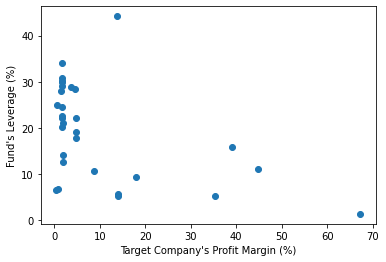

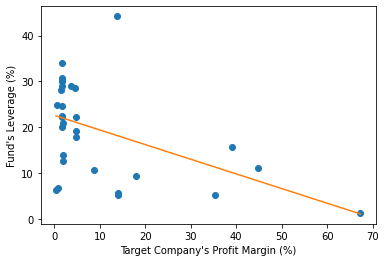

In [ ]:
# Best fit line
dfBinned1 = df.groupby('bin1')['profit', 'leverage'].mean()
x = dfBinned1['profit']
y = dfBinned1['leverage']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope * x + intercept

# Figure: Binned Data (no best-fit)
fig = plt.figure()
plt.plot(dfBinned1['profit'], dfBinned1['leverage'], 'o') 
plt.xlabel("Target Company's Profit Margin (%)")
plt.ylabel("Fund's Leverage (%)")
fig.savefig("leverage-profit-binned.png")

# Figure: Binned Data (with best-fit)
fig = plt.figure()
plt.plot(dfBinned1['profit'], dfBinned1['leverage'], 'o', dfBinned1['profit'], line) 
plt.xlabel("Target Company's Profit Margin (%)")
plt.ylabel("Fund's Leverage (%)")
fig.savefig("leverage-profit-binned-fit.png")
